# Assignment 1

In [4]:
# Usual Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [5]:
food_inspection_data = pd.read_csv("../data/Food_Inspections.csv")
food_inspection_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2563767,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,09/15/2022,Non-Inspection,No Entry,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)"
1,2563480,FINKI ELEMENTARY ACADEMY,FINKI ELEMENTARY ACADEMY,23541.0,School,Risk 1 (High),2332 S Western (2400W),CHICAGO,IL,60608.0,09/12/2022,Canvass,Pass,NaN,NaN,NaN,NaN
2,2563279,SH GRILL,SH GRILL,2863054.0,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,IL,60607.0,09/06/2022,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
3,2562053,SUBWAY,SUBWAY,2863267.0,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,IL,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
4,2560592,PROVARE CHICAGO,PROVARE CHICAGO,2796734.0,Restaurant,Risk 1 (High),1421 W CHICAGO AVE,CHICAGO,IL,60642.0,07/12/2022,Canvass,Pass,NaN,41.896025,-87.663272,"(41.89602502708334, -87.66327229348566)"


In [6]:
failed_inspection_data = food_inspection_data[(food_inspection_data["Results"]=="Fail") & (food_inspection_data["Violations"].notna())]

In [7]:
def extract_descriptions(violation):
    split_violations = violation.split(sep="|")
    regex_values = []
    pattern = r"(?<=\d\.).*(?= - Comments)"
    for i in split_violations:
        regex = re.search(pattern,i)
        if regex is None:
            string = i.strip()
            string = re.sub(r"(\d{1,3}. )","",string)
            regex_values.append(string)
        else:
            string  = i[regex.start(0):regex.end(0)].strip()
            regex_values.append(string)
    return '|'.join(regex_values)

In [9]:
description_extract_df = failed_inspection_data["Violations"].apply(extract_descriptions)
description_extract_df  = description_extract_df.str.get_dummies(sep = "|")

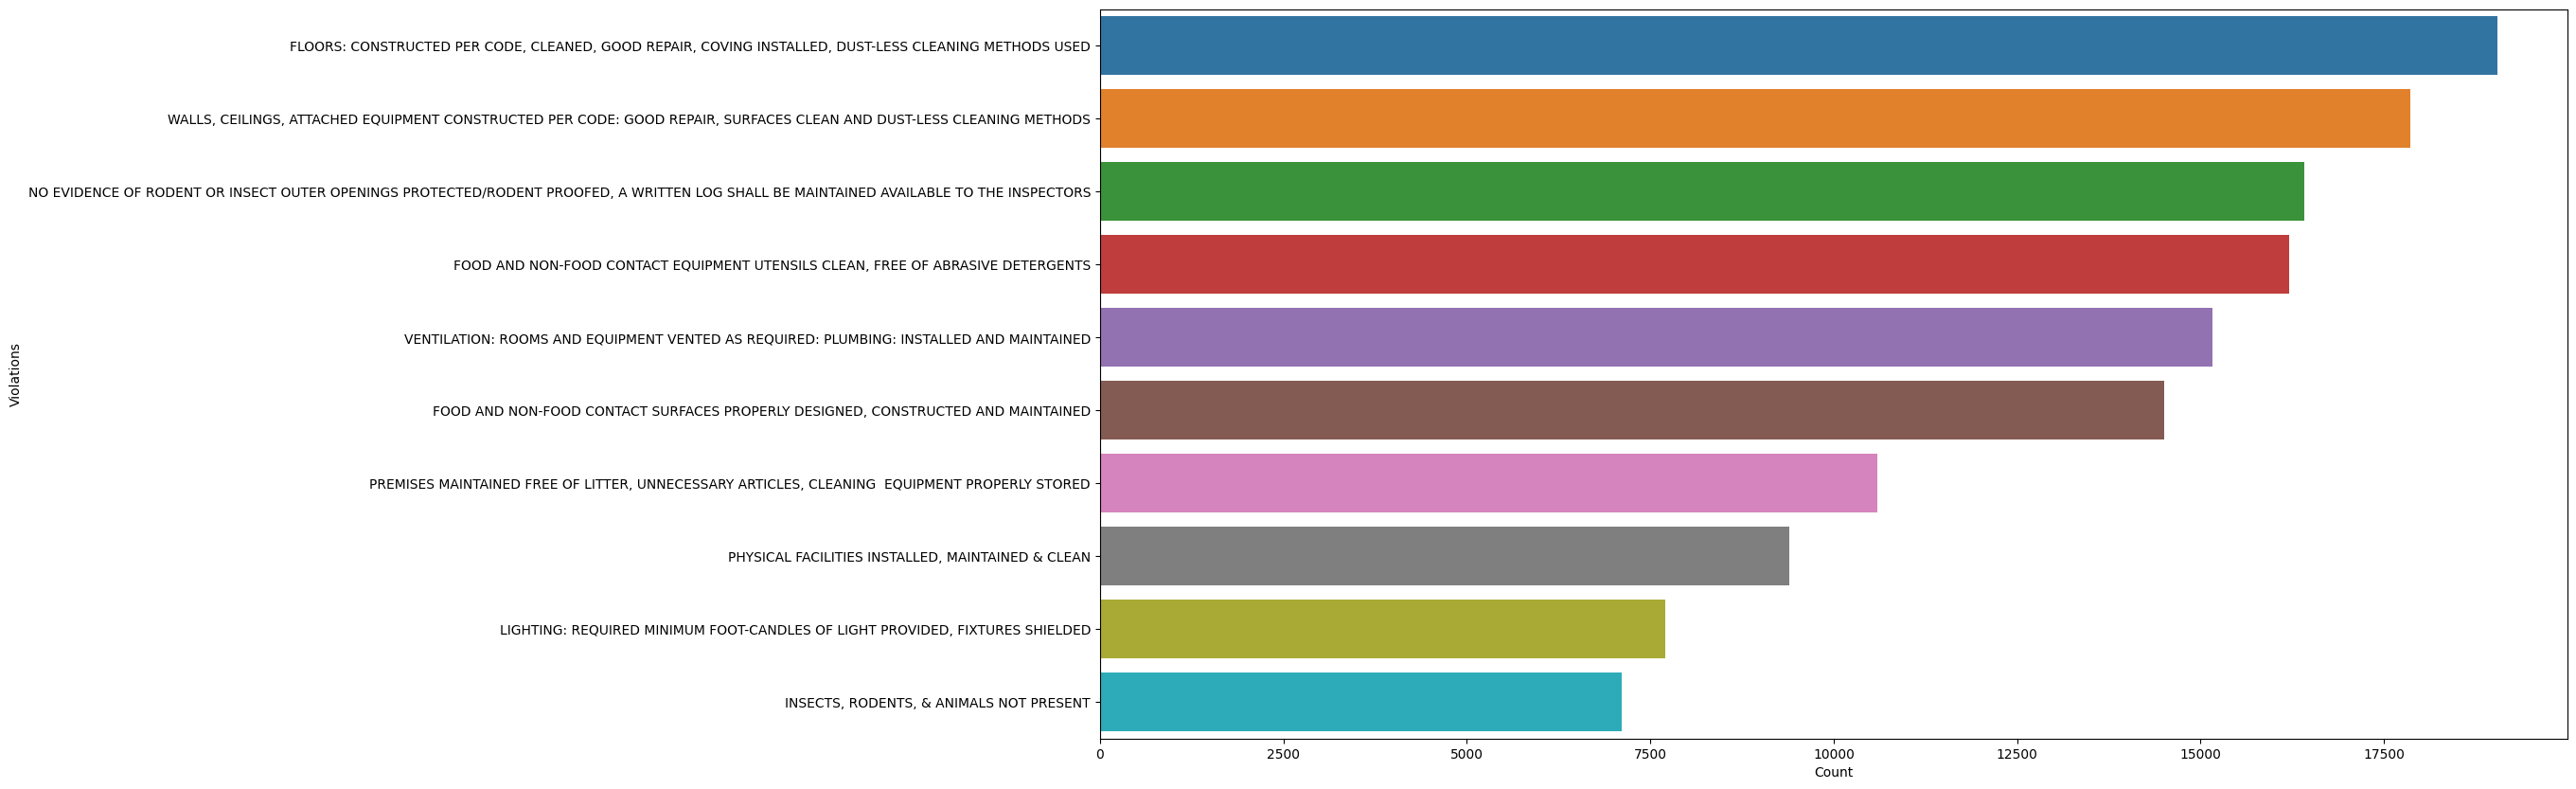

In [14]:
sums = pd.DataFrame(description_extract_df.sum(axis=0),columns=["Count"]).sort_values(by="Count",ascending=False)
sums.reset_index(inplace=True)
sums = sums.rename(columns = {'index':'Violations'})
fig,axs = plt.subplots(1,1,figsize=(20,10))
top_violations = sns.barplot(data=sums[:10],x="Count",y="Violations",ax=axs)

In [69]:
failed_inspection_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45435 entries, 36 to 251196
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    45435 non-null  int64  
 1   DBA Name         45435 non-null  object 
 2   AKA Name         44970 non-null  object 
 3   License #        45435 non-null  float64
 4   Facility Type    45402 non-null  object 
 5   Risk             45434 non-null  object 
 6   Address          45435 non-null  object 
 7   City             45413 non-null  object 
 8   State            45425 non-null  object 
 9   Zip              45430 non-null  float64
 10  Inspection Date  45435 non-null  object 
 11  Inspection Type  45435 non-null  object 
 12  Results          45435 non-null  object 
 13  Violations       45435 non-null  object 
 14  Latitude         45276 non-null  float64
 15  Longitude        45276 non-null  float64
 16  Location         45276 non-null  object 
dtypes: float64(4), 

In [20]:
failed_inspection_data[failed_inspection_data["License #"].isna()]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
212422,679787,GOD'S BATTLE AXE PRAYER ACADEMY,GOD'S BATTLE AXE PRAYER ACADEMY,NaN,CHURCH/DAY CARE,Risk 1 (High),6969 N WESTERN AVE,CHICAGO,IL,60645.0,03/14/2012,Canvass Re-Inspection,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...",42.008303,-87.690005,"(42.008303130687445, -87.69000508529592)"
214480,670328,GOD'S BATTLE AXE PRAYER ACADEMY,GOD'S BATTLE AXE PRAYER ACADEMY,NaN,CHURCH/DAY CARE,Risk 1 (High),6969 N WESTERN AVE,CHICAGO,IL,60645.0,02/09/2012,Canvass,Fail,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",42.008303,-87.690005,"(42.008303130687445, -87.69000508529592)"


As we can see, that the license # for the na columns will be the same as they are the same restaurant, so we can set a custom temporary license number for the time being.

In [36]:
failed_inspection_data[failed_inspection_data["License #"] == 99999999]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location


In [37]:
failed_inspection_data.loc[failed_inspection_data["License #"].isna(),"License #"] = 99999999

In [86]:
failed_inspection_data[failed_inspection_data["License #"] == 0]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1233,2104671,MA DEARS DOWN HOME KITCHEN,MA DEARS DOWN HOME KITCHEN,0.0,Restaurant,Risk 1 (High),2136 S PULASKI RD,CHICAGO,IL,60623.0,11/14/2017,Complaint,Fail,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.852453,-87.724931,"(41.85245257951689, -87.72493137844741)"
1501,2050319,BBQ SUPPLY,BBQ SUPPLY,0.0,Restaurant,Risk 1 (High),6948 N WESTERN AVE,CHICAGO,IL,60645.0,05/12/2017,Complaint,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,42.008278,-87.690299,"(42.008277723075075, -87.6902989251108)"
3252,1214649,HOPE HOUSE,HOPE HOUSE,0.0,Shelter,Risk 1 (High),3551 W ROOSEVELT RD,CHICAGO,IL,60624.0,05/04/2012,Consultation,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.866185,-87.714994,"(41.86618476056125, -87.71499389564326)"
3991,2570883,PILSEN FOOD PANTRY,PILSEN FOOD PANTRY,0.0,FOOD PANTRY,Risk 3 (Low),1850 S THROOP ST,CHICAGO,IL,60608.0,02/07/2023,Short Form Complaint,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.856392,-87.658977,"(41.856392087025945, -87.65897740799433)"
4074,2570199,MARGARETS VILLAGE BELIEVE SHELTER,MARGARETS VILLAGE BELIEVE SHELTER,0.0,Shelter,Risk 1 (High),9519 S COMMERCIAL AVE,CHICAGO,IL,60617.0,01/25/2023,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.722165,-87.550924,"(41.722164563958295, -87.5509236339397)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244524,120483,The Inner Voice,TAB West,0.0,Shelter,Risk 1 (High),2678 W WASHINGTON ST,CHICAGO,IL,60612.0,06/03/2010,Complaint,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.883032,-87.693876,"(41.883032312644374, -87.69387557226207)"
245503,114502,Dippin' Dots At Navy Pier,Dippin' Dots,0.0,Navy Pier Kiosk,Risk 2 (Medium),600 E GRAND AVE,CHICAGO,IL,60611.0,06/10/2010,License,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...",41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)"
246509,74431,MICHAEL'S FRESH MARKET,MICHAEL'S FRESH MARKET,0.0,Grocery Store,Risk 1 (High),1300 E 47TH ST BLDG,CHICAGO,IL,60615.0,05/03/2010,Consultation,Fail,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.809773,-87.594961,"(41.80977272660802, -87.59496089093687)"
246732,52244,PEOPLES CHURCH OF CHICAGO,PEOPLES CHURCH OF CHICAGO,0.0,SOUP KITCHEN,Risk 1 (High),941 W LAWRENCE AVE,CHICAGO,IL,60640.0,04/14/2010,Complaint,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.968990,-87.654054,"(41.968990042026846, -87.65405444663996)"


In [74]:
x = failed_inspection_data["License #"].astype(str).unique()
len(x)

20540

In [85]:
x = failed_inspection_data["DBA Name"].str.strip() + "|" + failed_inspection_data["Address"].str.strip()
y = failed_inspection_data["License #"].astype(str) + "|" + failed_inspection_data["Address"].str.strip()
print(len(x.unique()),len(y.unique()))

19604 20721


Thus we will use the License # and the address 

In [ ]:
repeat_offenders_df["Licenses"] = failed_inspection_data[]